# People Analyics - HR Employee Attrition and Workforce Dynamics

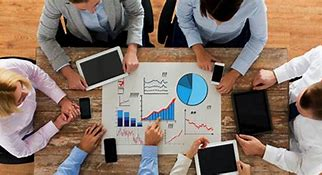

## About Dataset

The data was gotten from [kaggle](https://www.kaggle.com/datasets/jash312/hr-employee-attrition-datasets).

The combined data source integrates information from four distinct tables, providing a comprehensive overview of various aspects related to the organization's workforce. Here's a brief description of the combined data source:

### Employee Office Survey (Feedbacks):

* Captures employee feedback data for each office location from the years 2017 to 2022.

* Includes ratings or feedback scores for employees, shedding light on their performance and satisfaction levels.

* Provides insights into the evolving trends in employee feedback over the specified timeframe.

### Job Position Structure:

* Details the organizational hierarchy and job roles within different departments.

* Outlines the structure with information on departments, job levels, and specific job roles.

* Serves as a reference for understanding the organization's job hierarchy and the diversity of roles available.

### Office Locations (Canada and US):

* Encompasses information about office locations, particularly highlighting 5 offices in Canada and 3 offices in the United States.

* Includes details such as office codes, city locations, provinces (or states), and countries.

* Offers a geographical perspective on the distribution of offices across North America.

### Employee Attrition Information:

* Provides insights into employee attrition, including details such as leaving years, reasons for leaving, and relieving statuses.

* Helps in understanding patterns and factors contributing to employee turnover within the organization.

* Acts as a valuable resource for analyzing workforce dynamics and making informed HR decisions.

The combined data source thus offers a holistic view of the organization's workforce dynamics, encompassing employee feedback, job structure, office locations, and attrition information. This integrated dataset enables a more comprehensive analysis of the relationships and trends within the organization over time.

## Objectives:

1. Provide insights into employee attrition from the data

2. Is there any trends, patterns or factors contributing to employee turnover within the organization?

3. With your analysis, help the organization to make informed HR decisions about worforce dynamics

4. What are the relationships and trends within the organization over time?

5. Provide insights into the evolving trends in employee feedback over the specified timeframe.

## My Approach:

1. Data Cleaning

   * Merge the tables
   
   * Check for null values and treat them accordingly
   
   * Check for duplicate values
   
   * Tidy up the data

3. Exporative Data Analysis

4. Insights and Recommendations

5. Conclusion

### 1. Data Cleaning

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read in the Employee Office Survey (Feedbacks) data
df = pd.read_csv("Employee_office_survey.csv")

# View the first 5 rows
df.head()

,emp_id,off_cde,rated_year,rating
0,100000,BOS,2017,8.0
1,100000,BOS,2018,7.5
2,100000,BOS,2019,6.0
3,100001,NYC,2017,6.0
4,100001,NYC,2018,7.0


In [3]:
# Read in the Job Position Structure data
df1 = pd.read_csv("Job_position_structure.csv")

# View the first 5 rows
df1.head()

,Department,JobLevel,JobRole
0,Corporate Functions,L1,Administrative Assistant
1,Corporate Functions,L2,Administrative Coordinator
2,Corporate Functions,L3,Administrative Specialist
3,Corporate Functions,L4,Administrative Analyst
4,Corporate Functions,L5,Administrative Manager


In [4]:
# Read in the Office Locations (Canada and US) data
df2 = pd.read_csv("Office_codes.csv")

# View the first 5 rows
df2.head()

,office_code,city,province,country
0,TOR,Toronto,ON,Canada
1,MKM,Markham,ON,Canada
2,CAL,Calgary,AB,Canada
3,OTT,Ottawa,ON,Canada
4,VAN,Vancouver,BC,Canada


In [5]:
# Read in the Employee Attrition Information data
df3 = pd.read_csv("HR Employee data.csv")

# View the first 5 rows
df3.head()

,EmployeeID,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,LeavingYear,Reason,RelievingStatus,office_code,JobLevel_updated
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,14,4,5,3,Yes,2019.0,long hours,Voluntary,BOS,L7
1,100001,2006,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,1,519,...,12,4,5,3,Yes,2018.0,medical issues,Voluntary,NYC,L6
2,100002,2006,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,1,1572,...,12,3,1,4,Yes,2018.0,retiring,Voluntary,OTT,L6
3,100003,2006,54,Travel_Rarely,215,Corporate Functions,19,Diploma,1,309,...,13,4,5,3,Yes,2019.0,career change,Voluntary,NYC,L7
4,100004,2007,57,Travel_Rarely,285,Marketing,2,Diploma,1,828,...,11,5,5,3,Yes,2018.0,retiring,Voluntary,CAL,L5


**Check the Employee Survey (Feedbacks) data closely**

In [6]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47107 entries, 0 to 47106
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   emp_id      47107 non-null  int64  
 1   off_cde     47107 non-null  object 
 2   rated_year  47107 non-null  int64  
 3   rating      47107 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ MB


In [7]:
# Check the dimension
df.shape

(47107, 4)

In [8]:
# How many employees are in the data
df['emp_id'].count()

47107

There are 47,107 employees in the organization

In [9]:
# Check the size of the data
df.size

188428

In [10]:
# Check for null values
df.isnull().sum()

emp_id        0
off_cde       0
rated_year    0
rating        0
dtype: int64

No null values in df

In [11]:
# Check for duplicate values
df.duplicated().value_counts()

False    47107
Name: count, dtype: int64

No duplicate value in df

In [12]:
# Descriptive statistics
df.describe()

,emp_id,rated_year,rating
count,47107.000000,47107.000000,47107.000000
mean,105686.760481,2020.235995,8.309487
std,3732.116563,1.466009,1.146675
min,100000.000000,2017.000000,3.000000
25%,102475.000000,2019.000000,7.500000
50%,105283.000000,2020.000000,8.500000
75%,108725.000000,2021.000000,9.000000
max,113422.000000,2022.000000,10.000000


In [13]:
# Check the columns
df.columns

Index(['emp_id', 'off_cde', 'rated_year', 'rating'], dtype='object')

In [14]:
# Check the values of each column
print(df['emp_id'].unique())

print("---------------------")

print(df['off_cde'].unique())

print("---------------------")

print(df['rated_year'].unique())

print("---------------------")

print(df['rating'].unique())

[100000 100001 100002 ... 113420 113421 113422]
---------------------
['BOS' 'NYC' 'OTT' 'CAL' 'PHL' 'MKM' 'VAN' 'TOR']
---------------------
[2017 2018 2019 2020 2021 2022]
---------------------
[ 8.   7.5  6.   7.   8.5  6.5  9.5  9.  10.   4.5  5.   4.   3.   3.5
  5.5]


The Employee Survey (Feedbacks) data is now clean.

**Check the Job Position Structure data closely**

In [15]:
# Check info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Department  32 non-null     object
 1   JobLevel    32 non-null     object
 2   JobRole     32 non-null     object
dtypes: object(3)
memory usage: 900.0+ bytes


In [16]:
# View the data
df1

,Department,JobLevel,JobRole
0,Corporate Functions,L1,Administrative Assistant
1,Corporate Functions,L2,Administrative Coordinator
2,Corporate Functions,L3,Administrative Specialist
3,Corporate Functions,L4,Administrative Analyst
4,Corporate Functions,L5,Administrative Manager
5,Corporate Functions,L6,Director
6,Corporate Functions,L7,Vice President (VP) or Chief Officer
7,Marketing,L1,Coordinator
8,Marketing,L2,Specialist
9,Marketing,L3,Marketing Analyst


There are 32 departments in the organization

In [17]:
# Check the job roles available in the data
print(df1['JobRole'].unique())

print("------------------------")

print(df1['JobRole'].nunique())

['Administrative Assistant' 'Administrative Coordinator'
 'Administrative Specialist' 'Administrative Analyst'
 'Administrative Manager' 'Director'
 'Vice President (VP) or Chief Officer ' 'Coordinator' 'Specialist'
 'Marketing Analyst' 'Marketing Manager' 'Director of Marketing'
 'Service Delivery Analyst' 'Senior Service Delivery Analyst'
 'Lead Service Delivery Analyst' 'Service Delivery Manager'
 'Director of Service Delivery' 'Product Coordinator'
 'Associate Product Manager' 'Product Manager' 'Senior Product Manager'
 'Director of Product Management' 'Sales Development Representative'
 'Account Executive' 'Senior Account Executive' 'Sales Manager'
 'Director of Sales' 'HR Coordinator' 'HR Generalist'
 'Senior HR Generalist' 'HR Manager' 'Director of Human Resources']
------------------------
32


There are also 32 different job roles in the organization

In [18]:
# Check the job levels available in the data
print(df1['JobLevel'].unique())

print("----------------------")

print(df1['JobLevel'].nunique())

['L1' 'L2' 'L3' 'L4' 'L5' 'L6' 'L7']
----------------------
7


There are 7 job levels in the organization

In [19]:
# Change the column heads to lower cases
df1.columns = df1.columns.str.lower()

# Check
df1.columns

Index(['department', 'joblevel', 'jobrole'], dtype='object')

In [20]:
# Check
df1.head()

,department,joblevel,jobrole
0,Corporate Functions,L1,Administrative Assistant
1,Corporate Functions,L2,Administrative Coordinator
2,Corporate Functions,L3,Administrative Specialist
3,Corporate Functions,L4,Administrative Analyst
4,Corporate Functions,L5,Administrative Manager


In [21]:
# Rename some of the columns in df1
df1.rename(columns={'joblevel': 'job_level', 'jobrole': 'job_role'}, 
           inplace=True)

# Check
df1.head()

,department,job_level,job_role
0,Corporate Functions,L1,Administrative Assistant
1,Corporate Functions,L2,Administrative Coordinator
2,Corporate Functions,L3,Administrative Specialist
3,Corporate Functions,L4,Administrative Analyst
4,Corporate Functions,L5,Administrative Manager


The Job Position Structure data is now clean.

**Check the Office Locations (Canada and US) data closely**

In [22]:
# Check info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   office_code  8 non-null      object
 1   city         8 non-null      object
 2   province     8 non-null      object
 3   country      8 non-null      object
dtypes: object(4)
memory usage: 388.0+ bytes


In [23]:
# View the data
df2

,office_code,city,province,country
0,TOR,Toronto,ON,Canada
1,MKM,Markham,ON,Canada
2,CAL,Calgary,AB,Canada
3,OTT,Ottawa,ON,Canada
4,VAN,Vancouver,BC,Canada
5,NYC,NewYork,NY,US
6,BOS,Boston,MA,US
7,PHL,Philadelphia,PA,US


The offices are located in 5 Canadian cities and 3 US cities which makes up 3 provinces in Canada and 3 states in the US

In [24]:
# Check the dimension
df2.shape

(8, 4)

In [25]:
# Check for null values
df2.isnull().sum()

office_code    0
city           0
province       0
country        0
dtype: int64

No null values

In [26]:
# Check for duplicate values
df2.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

No duplicate values

The Office Locations (Canada and US) data is now clean.

**Check the Employee Attrition Information data closely**

In [27]:
# Check the info
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13423 entries, 0 to 13422
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                13423 non-null  int64  
 1   JoiningYear               13423 non-null  int64  
 2   Age                       13423 non-null  int64  
 3   BusinessTravel            13423 non-null  object 
 4   DailyRate                 13423 non-null  int64  
 5   Department                13423 non-null  object 
 6   DistanceFromHome          13423 non-null  int64  
 7   EducationField            13423 non-null  object 
 8   EmployeeCount             13423 non-null  int64  
 9   EmployeeNumber            13423 non-null  int64  
 10  EnvironmentSatisfaction   13423 non-null  int64  
 11  Gender                    13423 non-null  object 
 12  HourlyRate                13423 non-null  int64  
 13  JobInvolvement            13423 non-null  int64  
 14  JobSat

In [28]:
# View the columns
df3.columns

Index(['EmployeeID', 'JoiningYear', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition', 'LeavingYear', 'Reason', 'RelievingStatus', 'office_code',
       'JobLevel_updated'],
      dtype='object')

In [29]:
# Change the columns to lower cases
df3.columns = df3.columns.str.lower()

# Check
df3.columns

Index(['employeeid', 'joiningyear', 'age', 'businesstravel', 'dailyrate',
       'department', 'distancefromhome', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'jobsatisfaction', 'maritalstatus', 'monthlyincome',
       'monthlyrate', 'numcompaniesworked', 'over18', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'standardhours', 'stockoptionlevel', 'totalworkingyears',
       'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany',
       'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'attrition', 'leavingyear', 'reason', 'relievingstatus', 'office_code',
       'joblevel_updated'],
      dtype='object')

In [30]:
# Rename some of the columns
df3.rename(columns={'employeeid': 'employee_id', 'joiningyear': 'joining_year', 'businesstravel': 'business_travel', 
                   'dailyrate': 'daily_rate', 'distancefromhome': 'distance_from_home', 'educationfield': 'education_field', 
                   'employeecount': 'employee_count', 'employeenumber': 'employee_number', 
                    'environmentsatisfaction': 'environment_satisfaction', 'hourlyrate': 'hourly_rate', 
                    'jobinvolvement': 'job_involvement', 'jobsatisfaction': 'job_satisfaction', 
                    'maritalstatus': 'marital_status', 'monthlyincome': 'monthly_income', 'monthlyrate': 'monthly_rate', 
                   'numcompaniesworked': 'num_companies_worked', 'over18': 'over_18', 'overtime': 'over_time', 
                   'percentsalaryhike': 'percent_salary_hike', 'performancerating': 'performance_rating', 
                   'relationshipsatisfaction': 'relationship_satisfaction', 'standardhours': 'standard_hours', 
                   'stockoptionlevel': 'stock_option_level', 'totalworkingyears': 'total_working_years', 
                   'trainingtimeslastyear': 'training_times_last_year', 'worklifebalance': 'work_life_balance', 
                   'yearsatcompany': 'years_at_company', 'yearsincurrentrole': 'years_in_current_role', 
                    'yearssincelastpromotion': 'years_since_last_promotion', 'yearswithcurrmanager': 'years_with_curr_manager', 
                   'leavingyear': 'leaving_year', 'relievingstatus': 'relieving_status'}, inplace=True)

# Check
df3.head()

,employee_id,joining_year,age,business_travel,daily_rate,department,distance_from_home,education_field,employee_count,employee_number,...,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,attrition,leaving_year,reason,relieving_status,office_code,joblevel_updated
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,14,4,5,3,Yes,2019.0,long hours,Voluntary,BOS,L7
1,100001,2006,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,1,519,...,12,4,5,3,Yes,2018.0,medical issues,Voluntary,NYC,L6
2,100002,2006,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,1,1572,...,12,3,1,4,Yes,2018.0,retiring,Voluntary,OTT,L6
3,100003,2006,54,Travel_Rarely,215,Corporate Functions,19,Diploma,1,309,...,13,4,5,3,Yes,2019.0,career change,Voluntary,NYC,L7
4,100004,2007,57,Travel_Rarely,285,Marketing,2,Diploma,1,828,...,11,5,5,3,Yes,2018.0,retiring,Voluntary,CAL,L5


In [31]:
# Check the columns
df3.columns

Index(['employee_id', 'joining_year', 'age', 'business_travel', 'daily_rate',
       'department', 'distance_from_home', 'education_field', 'employee_count',
       'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_18',
       'over_time', 'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'standard_hours', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager', 'attrition',
       'leaving_year', 'reason', 'relieving_status', 'office_code',
       'joblevel_updated'],
      dtype='object')

In [32]:
# Check for null values
df3.isnull().sum()

employee_id                       0
joining_year                      0
age                               0
business_travel                   0
daily_rate                        0
department                        0
distance_from_home                0
education_field                   0
employee_count                    0
employee_number                   0
environment_satisfaction          0
gender                            0
hourly_rate                       0
job_involvement                   0
job_satisfaction                  0
marital_status                    0
monthly_income                    0
monthly_rate                      0
num_companies_worked              0
over_18                           0
over_time                         0
percent_salary_hike               0
performance_rating                0
relationship_satisfaction         0
standard_hours                    0
stock_option_level                0
total_working_years               0
training_times_last_year    

The null values in the data will be left untouched. I assume they're for employees that are still with the organization as staff, therefore they're null values

In [33]:
# Check for duplicate values
df3.duplicated().value_counts()

False    13423
Name: count, dtype: int64

No duplicate values

In [34]:
# Check the columns of the 4 tables
print(df.columns)

print("-----------------")

print(df1.columns)

print("-----------------")

print(df2.columns)

print("-----------------")

print(df3.columns)

Index(['emp_id', 'off_cde', 'rated_year', 'rating'], dtype='object')
-----------------
Index(['department', 'job_level', 'job_role'], dtype='object')
-----------------
Index(['office_code', 'city', 'province', 'country'], dtype='object')
-----------------
Index(['employee_id', 'joining_year', 'age', 'business_travel', 'daily_rate',
       'department', 'distance_from_home', 'education_field', 'employee_count',
       'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_18',
       'over_time', 'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'standard_hours', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager', 'attrition',
       'leaving_ye

In [35]:
# Rename 'off_cde' in df to 'office_code' and 'emp_id' to 'employee_id', then join df and df2 on 'office_code'
df.rename(columns={'emp_id': 'employee_id', 'off_cde': 'office_code'}, inplace=True)

# Join df and df2 on 'office_code'
merged_df = pd.merge(df, df2, on="office_code")

# Check 
merged_df.head()

,employee_id,office_code,rated_year,rating,city,province,country
0,100000,BOS,2017,8.0,Boston,MA,US
1,100000,BOS,2018,7.5,Boston,MA,US
2,100000,BOS,2019,6.0,Boston,MA,US
3,100008,BOS,2017,8.0,Boston,MA,US
4,100008,BOS,2018,6.5,Boston,MA,US


In [36]:
# Join merged_df with df3 on 'office_code' and 'employee_id'
merged_df = pd.merge(df3, merged_df, on=['employee_id', 'office_code'])

# Check
merged_df.head()

,employee_id,joining_year,age,business_travel,daily_rate,department,distance_from_home,education_field,employee_count,employee_number,...,leaving_year,reason,relieving_status,office_code,joblevel_updated,rated_year,rating,city,province,country
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,2019.0,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US
1,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,2019.0,long hours,Voluntary,BOS,L7,2018,7.5,Boston,MA,US
2,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,2019.0,long hours,Voluntary,BOS,L7,2019,6.0,Boston,MA,US
3,100001,2006,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,1,519,...,2018.0,medical issues,Voluntary,NYC,L6,2017,6.0,NewYork,NY,US
4,100001,2006,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,1,519,...,2018.0,medical issues,Voluntary,NYC,L6,2018,7.0,NewYork,NY,US


In [37]:
# Finally, join merged_df with df1 on 'department' 
merged_df = pd.merge(merged_df, df1, on='department')

# Check
merged_df.head()

,employee_id,joining_year,age,business_travel,daily_rate,department,distance_from_home,education_field,employee_count,employee_number,...,relieving_status,office_code,joblevel_updated,rated_year,rating,city,province,country,job_level,job_role
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,L1,Administrative Assistant
1,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,L2,Administrative Coordinator
2,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,L3,Administrative Specialist
3,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,L4,Administrative Analyst
4,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,L5,Administrative Manager


In [38]:
# Drop 'job_level' column
merged_df = merged_df.drop("job_level", axis=1)
# Check
merged_df.head()

,employee_id,joining_year,age,business_travel,daily_rate,department,distance_from_home,education_field,employee_count,employee_number,...,reason,relieving_status,office_code,joblevel_updated,rated_year,rating,city,province,country,job_role
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Assistant
1,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Coordinator
2,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Specialist
3,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Analyst
4,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Manager


In [39]:
# Rename 'joblevel_updated' to 'job_level'
merged_df.rename(columns={'joblevel_updated': 'job_level'}, inplace=True)

# Check
merged_df.head()

,employee_id,joining_year,age,business_travel,daily_rate,department,distance_from_home,education_field,employee_count,employee_number,...,reason,relieving_status,office_code,job_level,rated_year,rating,city,province,country,job_role
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Assistant
1,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Coordinator
2,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Specialist
3,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Analyst
4,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Manager


In [40]:
# Check for null values in merged_df
merged_df.isnull().sum()

employee_id                        0
joining_year                       0
age                                0
business_travel                    0
daily_rate                         0
department                         0
distance_from_home                 0
education_field                    0
employee_count                     0
employee_number                    0
environment_satisfaction           0
gender                             0
hourly_rate                        0
job_involvement                    0
job_satisfaction                   0
marital_status                     0
monthly_income                     0
monthly_rate                       0
num_companies_worked               0
over_18                            0
over_time                          0
percent_salary_hike                0
performance_rating                 0
relationship_satisfaction          0
standard_hours                     0
stock_option_level                 0
total_working_years                0
t

We'll leave the null values as it is, as it's indicative of employees that have not left the organization when the data was gathered, and as such have no reason for leaving and no relieving_status. We'll check the proportion of these employees later in our analysis.

**Our merged data is now clean and we can now proceed to EDA**

In [41]:
# Save the cleaned merged_df
merged_df.to_csv("HR_merged_data.csv", index=False)

### 2. Explorative Data Analysis

In [42]:
# Read in the merged data
merged_df = pd.read_csv("HR_merged_data.csv")

# View the first 5 rows of thedata
merged_df.head()

,employee_id,joining_year,age,business_travel,daily_rate,department,distance_from_home,education_field,employee_count,employee_number,...,reason,relieving_status,office_code,job_level,rated_year,rating,city,province,country,job_role
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Assistant
1,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Coordinator
2,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Specialist
3,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Analyst
4,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Manager


In [43]:
# Check the info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252521 entries, 0 to 252520
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   employee_id                 252521 non-null  int64  
 1   joining_year                252521 non-null  int64  
 2   age                         252521 non-null  int64  
 3   business_travel             252521 non-null  object 
 4   daily_rate                  252521 non-null  int64  
 5   department                  252521 non-null  object 
 6   distance_from_home          252521 non-null  int64  
 7   education_field             252521 non-null  object 
 8   employee_count              252521 non-null  int64  
 9   employee_number             252521 non-null  int64  
 10  environment_satisfaction    252521 non-null  int64  
 11  gender                      252521 non-null  object 
 12  hourly_rate                 252521 non-null  int64  
 13  job_involvemen

In [44]:
# Get the descriptive statistics
merged_df.describe()

,employee_id,joining_year,age,daily_rate,distance_from_home,employee_count,employee_number,environment_satisfaction,hourly_rate,job_involvement,...,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,leaving_year,rated_year,rating
count,252521.000000,252521.000000,252521.000000,252521.000000,252521.000000,252521.0,252521.000000,252521.000000,252521.000000,252521.000000,...,252521.000000,252521.000000,252521.000000,252521.000000,252521.000000,252521.000000,252521.000000,48032.000000,252521.000000,252521.000000
mean,105642.581504,2018.298846,37.224468,802.342225,8.851054,1.0,1025.589191,2.386487,65.397820,2.469371,...,12.236978,2.455273,2.505942,3.428099,2.198890,1.564808,2.166057,2020.564457,2020.228801,8.307923
std,3746.808841,2.182363,8.011351,356.618814,6.887605,0.0,549.368117,0.934736,17.171915,0.656570,...,7.664737,1.059327,0.650687,2.135916,1.131723,0.962956,1.085231,1.344142,1.469845,1.145968
min,100000.000000,2005.000000,18.000000,102.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,2017.000000,3.000000
25%,102418.000000,2017.000000,31.000000,515.000000,3.000000,1.0,560.000000,2.000000,52.000000,2.000000,...,7.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2020.000000,2019.000000,7.500000
50%,105234.000000,2019.000000,36.000000,795.000000,7.000000,1.0,1021.000000,2.000000,65.000000,3.000000,...,10.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,2021.000000,2020.000000,8.500000
75%,108694.000000,2020.000000,43.000000,1105.000000,13.000000,1.0,1493.000000,3.000000,79.000000,3.000000,...,16.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,2022.000000,2021.000000,9.000000
max,113422.000000,2021.000000,60.000000,1499.000000,29.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,40.000000,6.000000,4.000000,15.000000,7.000000,6.000000,6.000000,2022.000000,2022.000000,10.000000


In [45]:
# Summary statistics for 'joining_year'
merged_df['joining_year'].describe()

count    252521.000000
mean       2018.298846
std           2.182363
min        2005.000000
25%        2017.000000
50%        2019.000000
75%        2020.000000
max        2021.000000
Name: joining_year, dtype: float64

The minimum joining year in the data was 2005 and the maximum joining year was 2021.

In [46]:
# Summary statistics for 'age'
merged_df['age'].describe()

count    252521.000000
mean         37.224468
std           8.011351
min          18.000000
25%          31.000000
50%          36.000000
75%          43.000000
max          60.000000
Name: age, dtype: float64

The minimum employee age in the organization is 18, whie the maximum age is 60. The average workforce age in the organization is approximately 37 years. 

In [47]:
# Summary statistics for 'daily_rate'
merged_df['daily_rate'].describe()

count    252521.000000
mean        802.342225
std         356.618814
min         102.000000
25%         515.000000
50%         795.000000
75%        1105.000000
max        1499.000000
Name: daily_rate, dtype: float64

- The minimum daily rate is $ 102

- The maximum daily rate is $ 1499

- The average daily income rate is $ 802

In [48]:
# Summary statistics for 'distance_from_home'
merged_df['distance_from_home'].describe()

count    252521.000000
mean          8.851054
std           6.887605
min           1.000000
25%           3.000000
50%           7.000000
75%          13.000000
max          29.000000
Name: distance_from_home, dtype: float64

The minimum distance from home is 1m. The maximum distance covered from home to the office is 29m, while the average distance from home to the office is 8.85m

**Get the distributions of the numerical columns in the data**

In [49]:
# Select numerical columns for visualization
numerical_columns = ['joining_year', 'age', 'daily_rate', 'distance_from_home']

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


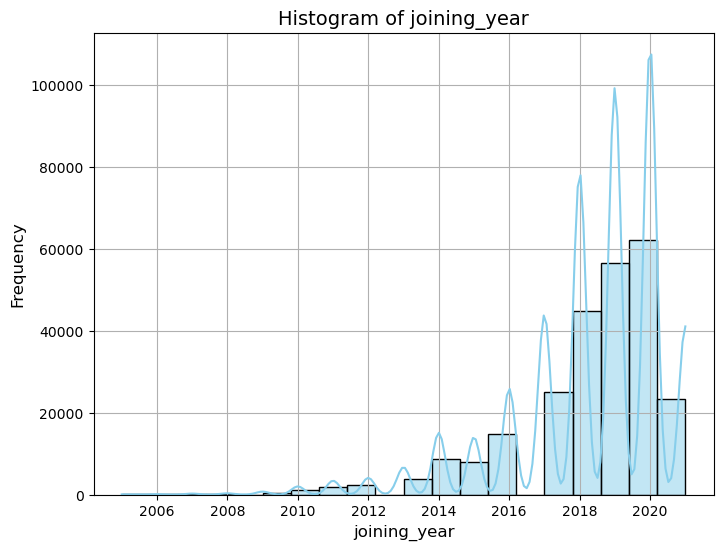

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


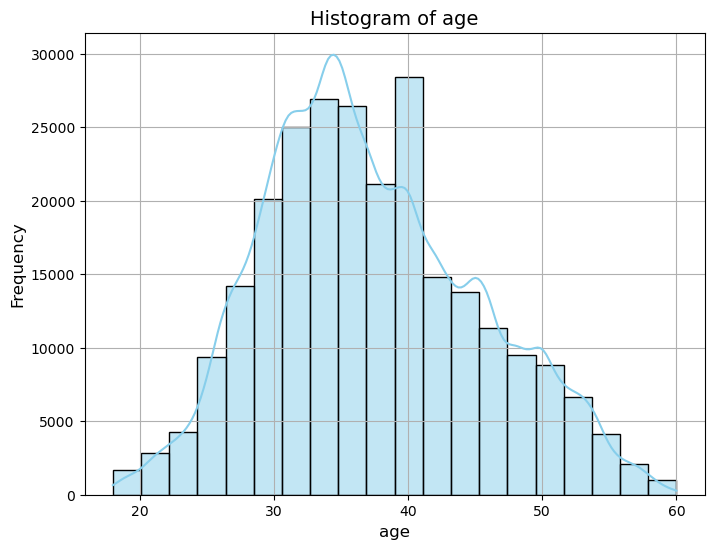

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


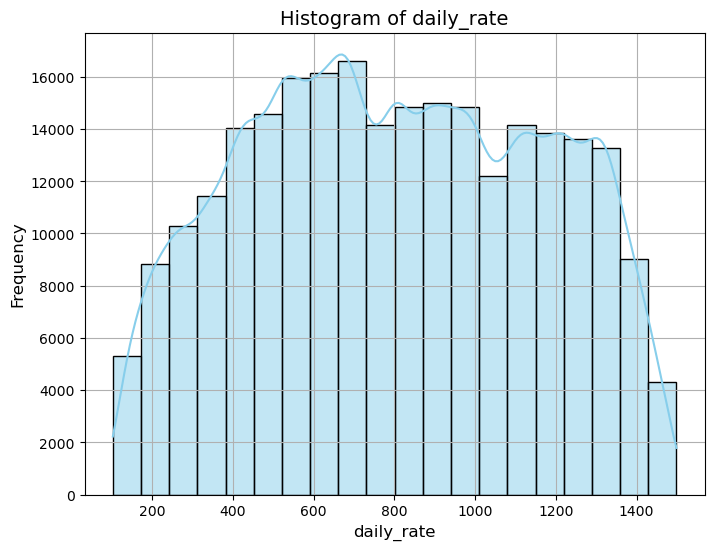

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


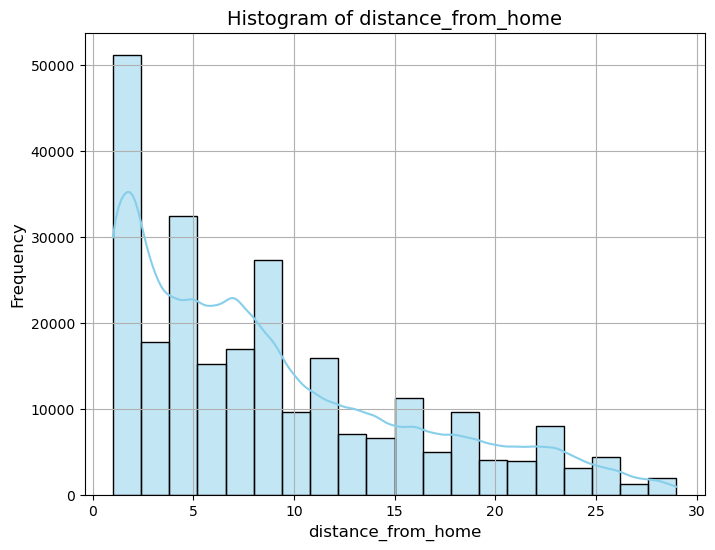

In [50]:
# Creating histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(merged_df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()

There're lots of insights we can deduct from the distribution plots above: 

* The distribution of age is a normal distrbution curve.

* There's an increasing trend in the frequency of employees joining the firm from 2009 up to 2020. Then, there was a sharp decline in 2021. This could be as a result of the impact of COVID-19 pandemic.

* We have the highest frequency of employees around the age of 37 in the organization. 

* The frequency of daily income rate is highest around 600 - 700 USD.

* More employees stay close to the office from their homes as the plot shows a negative trend of frequency against distance from home. 

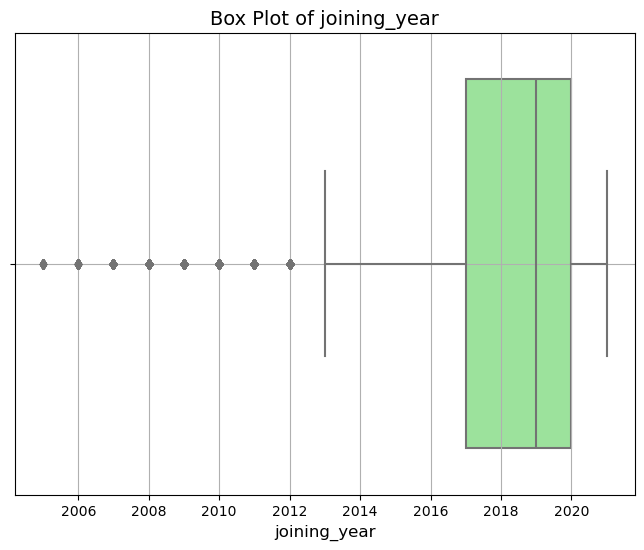

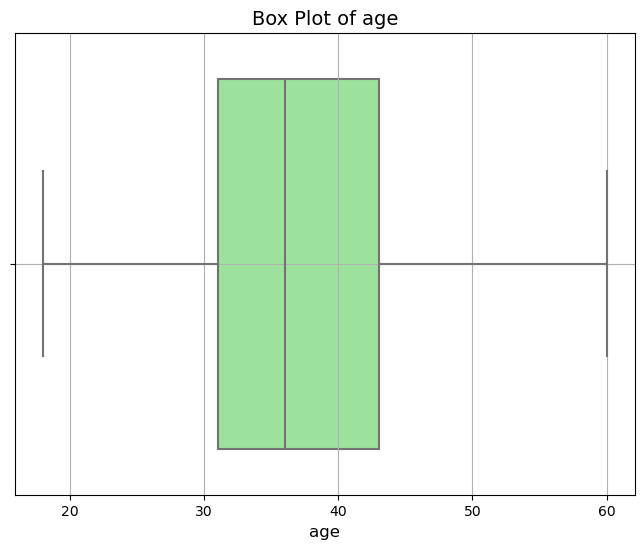

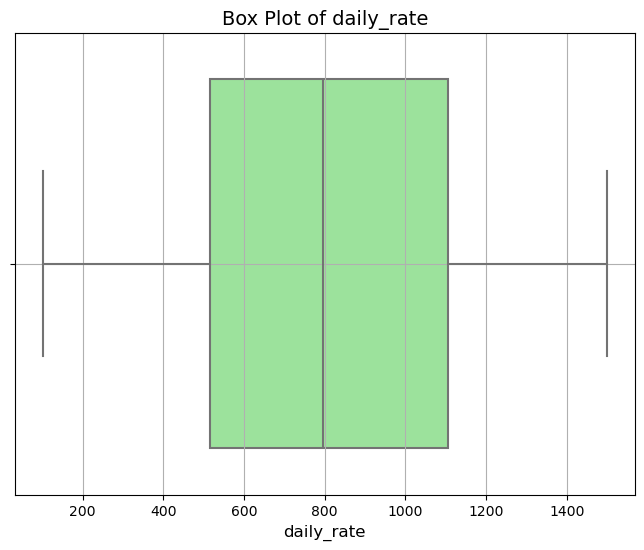

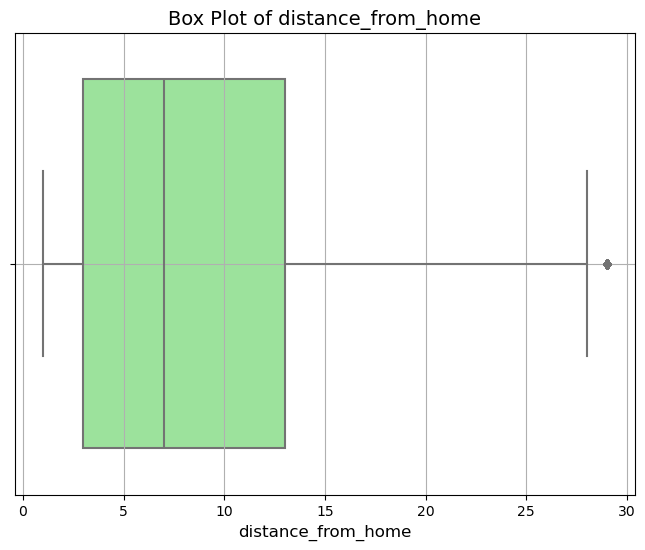

In [51]:
# Creating box plots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=merged_df[col], color='lightgreen')
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.grid(True)
    plt.show()

* There are some outliers in the 'joining_year' column between 2004 and 2012. We may need to focus more of our analysis from the year period 2013 to 2021

**Correlation Analysis**

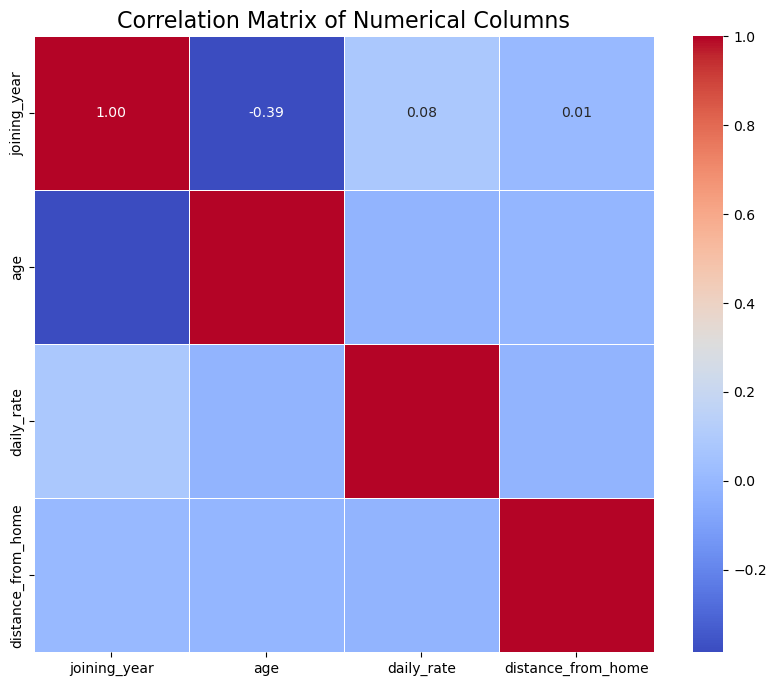

In [52]:
# Calculate the correlation matrix between the numerical columns to identify relationships between variables
corr_matrix = merged_df[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Numerical Columns", fontsize=16)
plt.show()

* There's a positive correlation between 'joining_year' and 'daily_rate'. 

* There's a negative correlation between 'joining_year' and 'age', that is, no correlation whatsover between the two variables.

**Let's explore the relationship between 'joining_year' and 'daily_rate' some more**

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


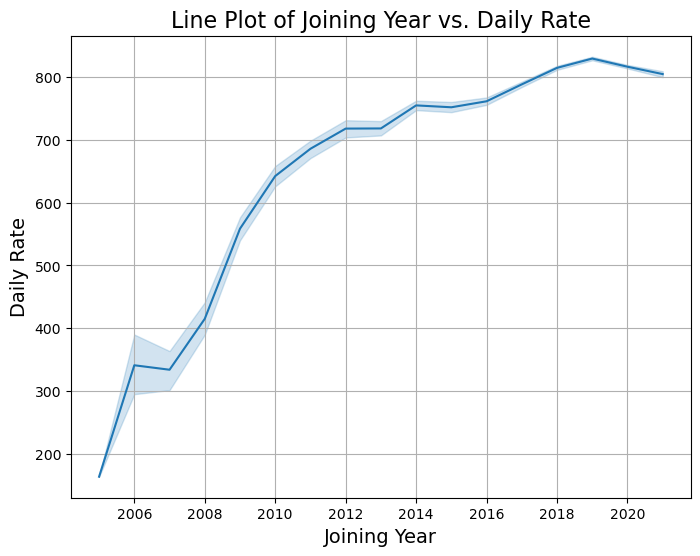

In [53]:
# Plotting line plot for 'joining_year' and 'daily_rate'
plt.figure(figsize=(8, 6))
sns.lineplot(x='joining_year', y='daily_rate', data=merged_df)
plt.title('Line Plot of Joining Year vs. Daily Rate', fontsize=16)
plt.xlabel('Joining Year', fontsize=14)
plt.ylabel('Daily Rate', fontsize=14)
plt.grid(True)
plt.show()

The relationship between 'joining_year' and 'daily_rate' is a linear relationship. As the year an employee joins the company increases, his/her daily rate increases as well. 

**Trend Analysis**

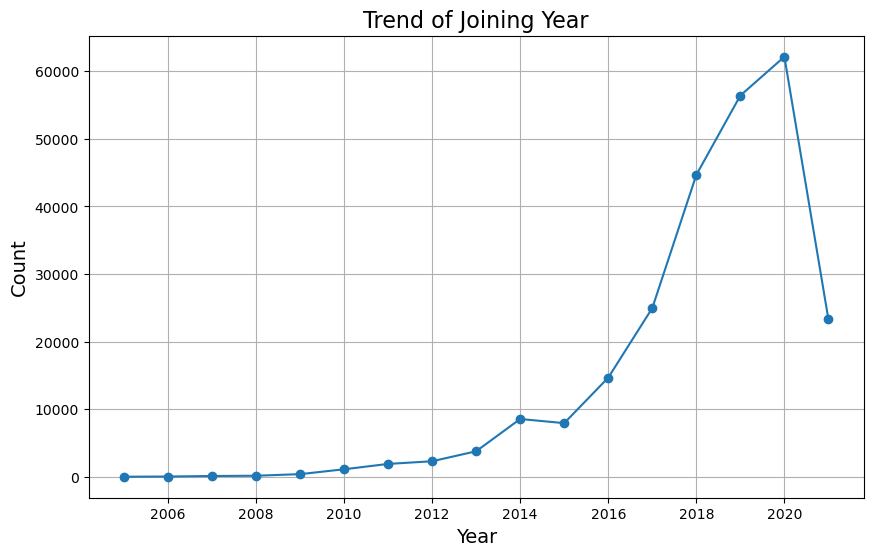

In [54]:
# Plot line chart to analyze trend over time for 'joining_year'
plt.figure(figsize=(10, 6))
plt.plot(merged_df['joining_year'].value_counts().sort_index(), marker='o', linestyle='-')
plt.title('Trend of Joining Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()

There was a sharp increase in joining the organization from 2015 to 2020, then a decline in 2021, possibly due to the effect of COVID-19 Pandemic on the business which then impacted the recruitment drive.

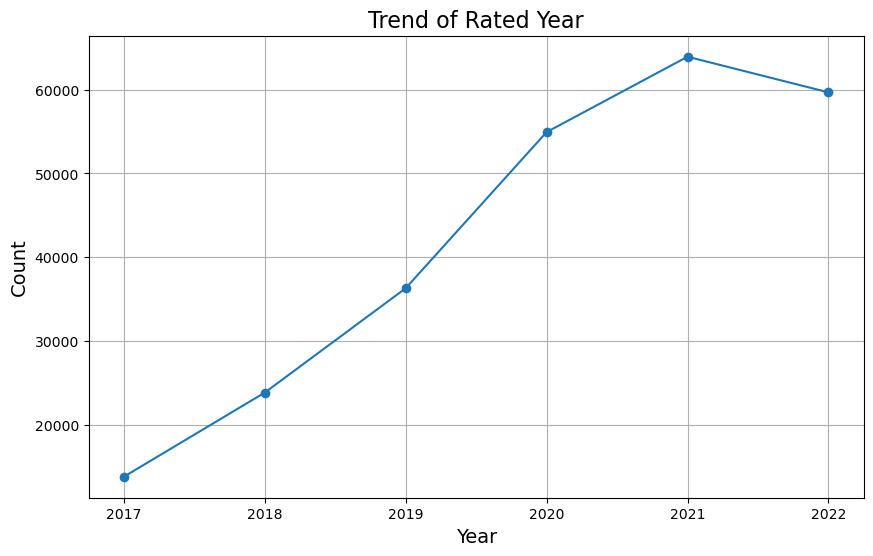

In [55]:
# Plot line chart to analyze trend over time for 'rated_year'
plt.figure(figsize=(10, 6))
plt.plot(merged_df['rated_year'].value_counts().sort_index(), marker='o', linestyle='-')
plt.title('Trend of Rated Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()

2021 was the highest rated year for the organization, even more than 2022, while 2017 was the lowest rated year. It seems that employees rated the organization higher as the year increases which shows increased organization performance.

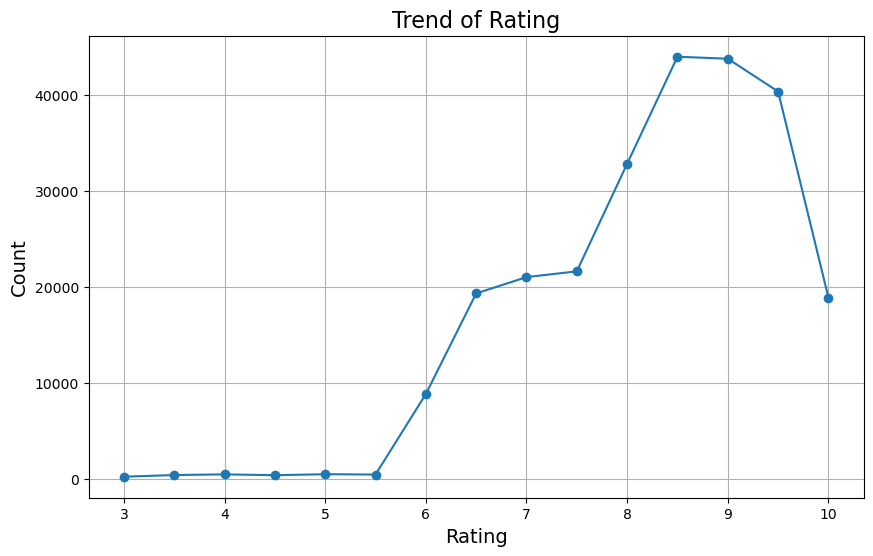

In [56]:
# Plot line chart to analyze trend over time for 'rating'
plt.figure(figsize=(10, 6))
plt.plot(merged_df['rating'].value_counts().sort_index(), marker='o', linestyle='-')
plt.title('Trend of Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()

More employees rated the organization 8.5 - 9, while just less than 1% of the employees rated the organization 3 - 5.5. That means, the organization enjoyed a higher rating from the employees which is to say the majority of the employees enjoyed working at the organization. 

**Segmentation Analysis**

In [57]:
# View first 5 rows of merged_df 
merged_df.head()

,employee_id,joining_year,age,business_travel,daily_rate,department,distance_from_home,education_field,employee_count,employee_number,...,reason,relieving_status,office_code,job_level,rated_year,rating,city,province,country,job_role
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Assistant
1,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Coordinator
2,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Specialist
3,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Analyst
4,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Manager


Let's segment the data based on the categorical variables such as:

* business_travel

* department

* education_field

**Business Travel**

In [58]:
# Group the data based on 'business_travel' and 'employee_count'
grouped_travel_count = merged_df.groupby('business_travel')['employee_count'].size().sort_values(ascending=False).reset_index()
grouped_travel_count

,business_travel,employee_count
0,Travel_Rarely,219330
1,Travel_Frequently,26086
2,Non-Travel,7105


Majority of the employees rarely travel, around 26,000 of the employees travel frequently, while over 7,000 employees don't travel at all.

In [59]:
# Group the data based on 'business_travel' and 'age'
grouped_business_travel = merged_df.groupby('business_travel')['age'].mean().sort_values(ascending=False).reset_index()
grouped_business_travel

,business_travel,age
0,Non-Travel,38.436735
1,Travel_Rarely,37.342981
2,Travel_Frequently,35.897838


Among all age groups, the average age of employees that don't travel at all is 38.3, followed by those that rarely travel at 37.3, and lastly those that travel frequently at 35.9. This shows that the more energetic and youthful employees travel frequently than the other counterparts.

**Department**

In [60]:
# Aggregate the data based on department and employee_count
grouped_dept = merged_df.groupby('department')['employee_count'].size().sort_values(ascending=False).reset_index()
grouped_dept

,department,employee_count
0,Corporate Functions,59451
1,Sales,39815
2,Delivery,38880
3,Product,38700
4,Marketing,38145
5,HR,37530


Corporate Functions department has the highest numbers of employees (about 60k), while HR department has the lowest numbers of employees (about 38k)

In [61]:
# Aggregate the data based on department and age
grouped_dept_age = merged_df.groupby('department')['age'].mean().sort_values(ascending=False).reset_index()
grouped_dept_age

,department,age
0,Corporate Functions,38.286824
1,Delivery,37.190201
2,Product,36.969897
3,Sales,36.959061
4,Marketing,36.703369
5,HR,36.650813


The average age of employees is highest in Corporate Functions department (38.3) and lowest in the HR department (36.7)

**Education Field**

In [62]:
# Agrregate the data based on education_field and employee_count
grouped_education = merged_df.groupby('education_field')['employee_count'].size().sort_values(ascending=False).reset_index()
grouped_education

,education_field,employee_count
0,Doctorate,64350
1,Diploma,63697
2,Masters,62836
3,Bachelors,61638


We  have more employees that have doctorate degrees, then diploma, followed by masters, and finally bachelor's degree in that order across the organization

In [63]:
# Agrregate the data based on education_field and age
grouped_education_age = merged_df.groupby('education_field')['age'].mean().sort_values(ascending=False).reset_index()
grouped_education_age

,education_field,age
0,Diploma,37.402939
1,Doctorate,37.229946
2,Masters,37.182236
3,Bachelors,37.077371


Based on educational qualifications, the average age of employees with Diploma is highest (37.4) in the organization while its lowest with Bachelor's degree (37.1).

**Geographical Analysis**

We'll perform this analysis by exploring the geographical distribution of employees through plotting a map showing the distribution of 'country'.

In [64]:
# import geopandas
import geopandas as gpd

In [65]:
# Load a shapefile of the world countries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

C:\Users\user\AppData\Local\Temp\ipykernel_5164\3866071785.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [66]:
# Change 'name' where it is 'United States of America' to 'US'
world.loc[world['name'] == 'United States of America', 'name'] = 'US'
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,US,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


**Geographical Distribution of Employees by Country**

In [67]:
# Group merged_df by 'country' and 'employee_count'
grouped_country = merged_df.groupby('country').size().reset_index(name='employee_count')
grouped_country

,country,employee_count
0,Canada,151575
1,US,100946


In [68]:
# Merge 'grouped_country' with world shapefile
world = world.merge(grouped_country, how='left', left_on='name', right_on='country')
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,employee_count
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,151575.0
4,328239523.0,North America,US,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",US,100946.0
...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN


In [69]:
# Drop all the null values
world.dropna(axis=0, inplace=True)

# View world
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,employee_count
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,151575.0
4,328239523.0,North America,US,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",US,100946.0


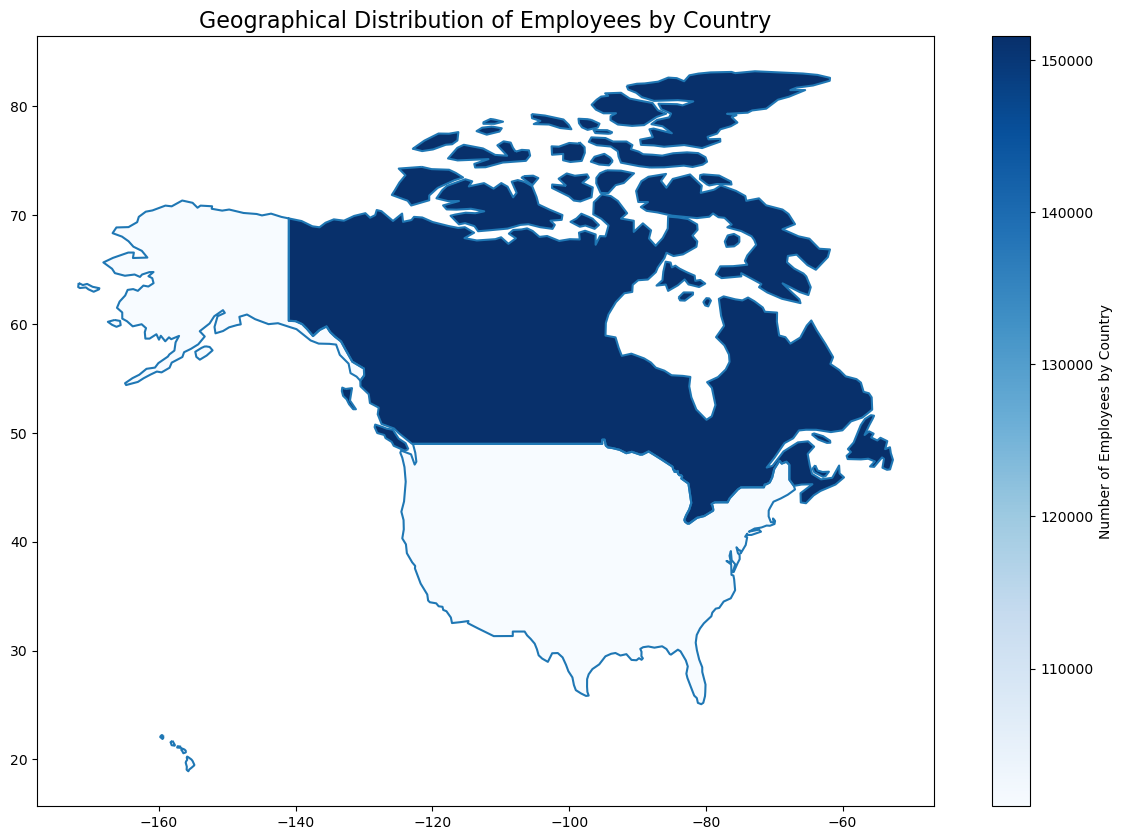

In [70]:
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='employee_count', cmap='Blues', ax=ax, legend=True,
          legend_kwds={'label': "Number of Employees by Country"})
plt.title("Geographical Distribution of Employees by Country", fontsize=16)
plt.show()

We have more employees in Canada (over 151,000) than in the US, who are just over 100,000 in total

**Distribution of Employees by Province/State**

In [71]:
# Group merged_df by 'province' and 'employee_count'
grouped_province = merged_df.groupby('province')['employee_count'].size().sort_values(ascending=False).reset_index()
grouped_province

,province,employee_count
0,ON,88254
1,MA,34629
2,PA,33272
3,NY,33045
4,AB,32271
5,BC,31050


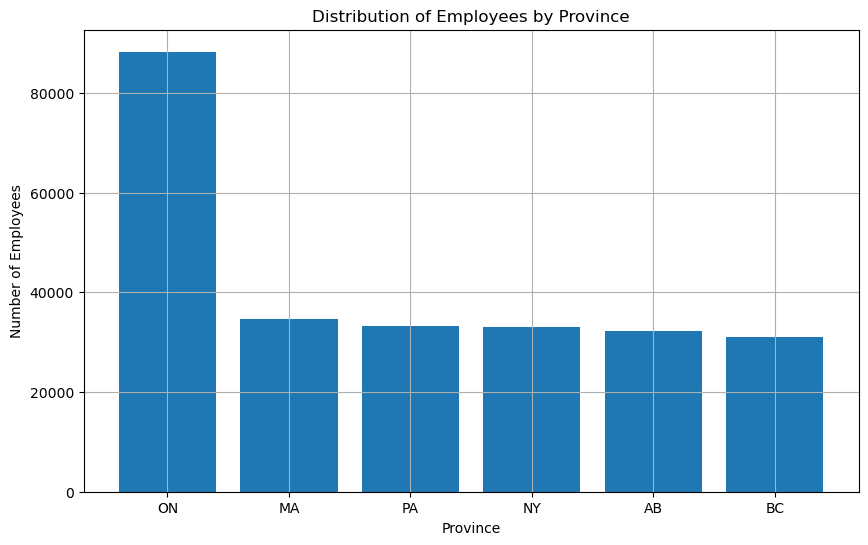

In [72]:
# Plot a bar chart here
plt.figure(figsize=(10, 6))
plt.bar(grouped_province['province'], grouped_province['employee_count'])
plt.xlabel("Province")
plt.ylabel("Number of Employees")
plt.title("Distribution of Employees by Province")
plt.grid(True)
plt.show()

The Ontario province has the highest numbers of employees, while British Columbia province has the lowest numbers of employees

**Distribution of Employees by City**

In [73]:
# Group merged_df by 'city' and 'employee_count'
grouped_city = merged_df.groupby('city')['employee_count'].size().sort_values(ascending=False).reset_index()
grouped_city

,city,employee_count
0,Boston,34629
1,Philadelphia,33272
2,NewYork,33045
3,Calgary,32271
4,Vancouver,31050
5,Markham,30568
6,Toronto,29711
7,Ottawa,27975


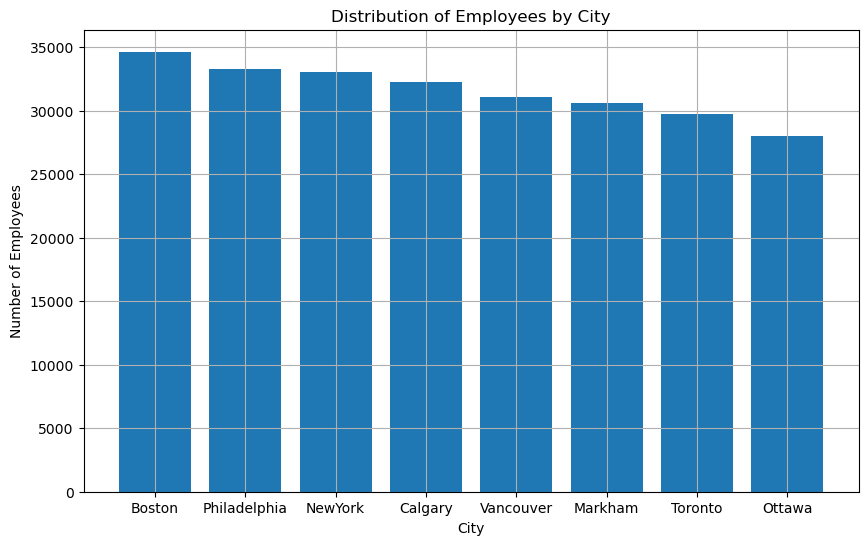

In [74]:
# Plot a bar chart here
plt.figure(figsize=(10, 6))
plt.bar(grouped_city['city'], grouped_city['employee_count'])
plt.xlabel("City")
plt.ylabel("Number of Employees")
plt.title("Distribution of Employees by City")
plt.grid(True)
plt.show()

The city with the highest numbers of employees in the organiation is Boston while Ottawa has the lowest numbers of employees.

### Attrition, Employee Performance and Organizational Performance

In [75]:
# View the data
merged_df.head()

,employee_id,joining_year,age,business_travel,daily_rate,department,distance_from_home,education_field,employee_count,employee_number,...,reason,relieving_status,office_code,job_level,rated_year,rating,city,province,country,job_role
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Assistant
1,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Coordinator
2,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Specialist
3,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Analyst
4,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,long hours,Voluntary,BOS,L7,2017,8.0,Boston,MA,US,Administrative Manager


**Employee and Organizational Performance**

In [76]:
# job_level and job_role
grouped_job_level_role = merged_df.groupby('job_role')['job_level'].max().sort_values(ascending=False).reset_index()
grouped_job_level_role

,job_role,job_level
0,Vice President (VP) or Chief Officer,L7
1,Administrative Assistant,L7
2,Administrative Coordinator,L7
3,Administrative Manager,L7
4,Administrative Specialist,L7
5,Administrative Analyst,L7
6,Director,L7
7,Senior HR Generalist,L5
8,Product Manager,L5
9,Sales Development Representative,L5


As should be expected, employees on higher job roles have higher job levels, therefore job roles are in direct proportion with job levels across the organization, which shows healthy employee and organizational performance

In [77]:
# Aggregate the data by 'job_role' and 'joining_year'
grouped_job_role_joining_yr = merged_df.groupby(['job_role', 
                                                 'joining_year']).agg({'employee_count': 'count',
                                                                                  'age': 'mean',
                                                                                  'daily_rate': 'mean'}).sort_values(by='joining_year', 
                                                                                                                     ascending=False).reset_index()
grouped_job_role_joining_yr

,job_role,joining_year,employee_count,age,daily_rate
0,Vice President (VP) or Chief Officer,2021,672,34.946429,802.247024
1,Sales Manager,2021,706,34.354108,809.487252
2,Administrative Analyst,2021,672,34.946429,802.247024
3,Product Manager,2021,784,33.688776,801.344388
4,Director of Sales,2021,706,34.354108,809.487252
...,...,...,...,...,...
439,Administrative Assistant,2005,3,57.000000,164.000000
440,Director,2005,3,57.000000,164.000000
441,Administrative Specialist,2005,3,57.000000,164.000000
442,Vice President (VP) or Chief Officer,2005,3,57.000000,164.000000


* From the above it shows that the higher the job role, the higher the daily rate, as should be expected. 

* Also, the employee count is higher in the recent years, which shows that employee and organizational performance are healthy.

In [78]:
# performance_rating by employee_count
grpd_performance = merged_df.groupby('performance_rating')['employee_count'].size().sort_values(ascending=False).reset_index()
grpd_performance

,performance_rating,employee_count
0,3,209280
1,4,18895
2,5,10852
3,2,6997
4,1,6497


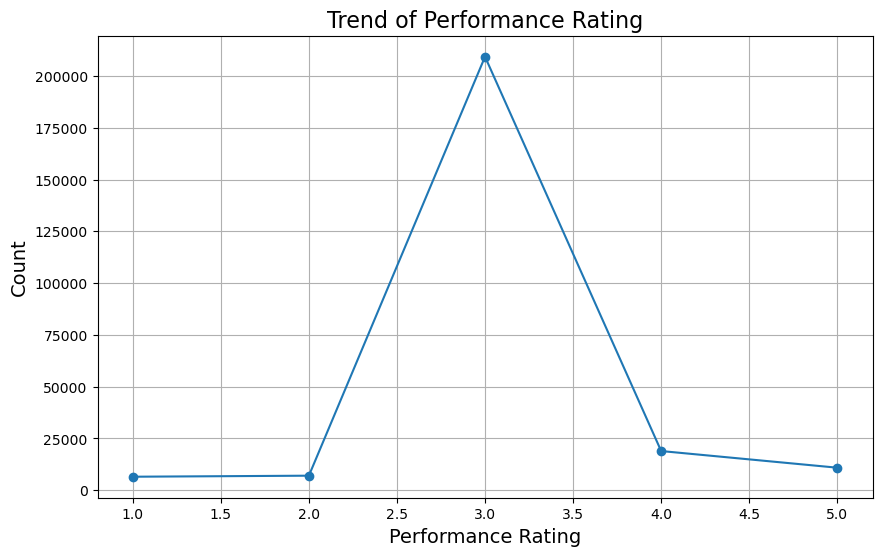

In [79]:
# Plot line chart to analyze trend over time for 'performance_rating'
plt.figure(figsize=(10, 6))
plt.plot(merged_df['performance_rating'].value_counts().sort_index(), 
         marker='o', linestyle='-')
plt.title('Trend of Performance Rating', fontsize=16)
plt.xlabel('Performance Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()

Most employees fall within the average performance category (rating 3), while a smaller proportion of employees are rated above or below average. This could indicate that the organization has a relatively balanced performance distribution, with a significant number of employees performing at an acceptable level.

In [80]:
# To determine organizational performance, we'll look at the relationship between 
# rating and employee_count
grouped_rating_employee_count = merged_df.groupby('rating').agg({'employee_count': 'count',
                                                                'daily_rate': 'mean'}).sort_values(by='rating', 
                                                                                                   ascending=False).reset_index()
grouped_rating_employee_count

,rating,employee_count,daily_rate
0,10.0,18856,815.591165
1,9.5,40328,805.180445
2,9.0,43744,800.039274
3,8.5,43953,808.849066
4,8.0,32797,801.685551
5,7.5,21589,801.869193
6,7.0,20987,797.279220
7,6.5,19286,796.398839
8,6.0,8799,781.065462
9,5.5,411,800.053528


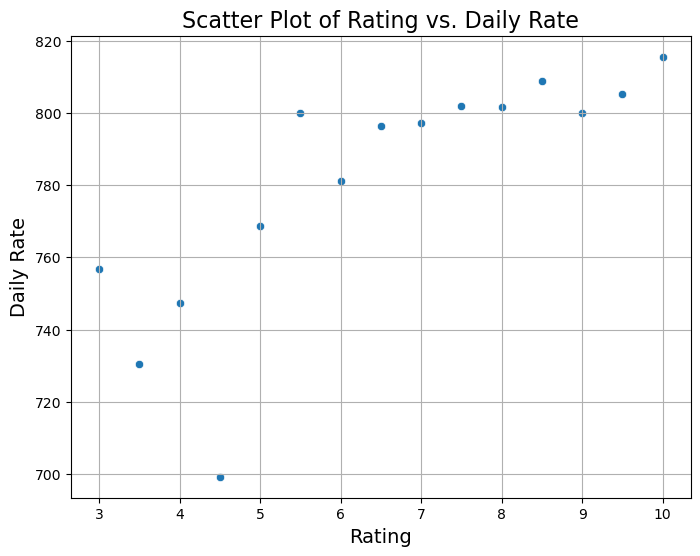

In [81]:
# Plot scatter plot for 'rating' and 'daily_rate'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating', y='daily_rate', data=grouped_rating_employee_count)
plt.title('Scatter Plot of Rating vs. Daily Rate', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Daily Rate', fontsize=14)
plt.grid(True)
plt.show()

Mostly, there's a positive relationship between rating and daily rate. The higher the daily rate, the higher the rating scores given to the organization by the employees

**Let's check the proportion of employees that are still with the company as at the time of gathering the data**

In [82]:
# Check values in the 'leaving_year' column
merged_df['leaving_year'].unique()

array([2019., 2018., 2021., 2020.,   nan, 2022.])

In [83]:
# Filter the employees with null values under 'leaving_year'
current_employees = merged_df[pd.isna(merged_df['leaving_year'])]

# Calculate the percentage of employees that are still with the company
percent_current_employees = (len(current_employees) / len(merged_df)) * 100

print(f"Percentage of Employees still with the company: {percent_current_employees:.2f}%")

Percentage of Employees still with the company: 80.98%


This percentage is very high, which shows that organizational performance is high and attrition rate/employee turnover is very low, which will be shown in the next section

**Attrition/Employee Turnover Level**

In [84]:
# To determine the attrition/employee turnover level in the organization,
# we'll look at the relationship between:
# employee_count, relieving_status and reason
grouped_empployee_count_reason = merged_df.groupby(['reason', 'relieving_status']).agg({'employee_count': 'count'}).sort_values(by='employee_count', 
                                                                                                                               ascending=False).reset_index()
grouped_empployee_count_reason

,reason,relieving_status,employee_count
0,retiring,Voluntary,4572
1,medical issues,Voluntary,4402
2,offered more money,Voluntary,4349
3,return to school,Voluntary,4270
4,long hours,Voluntary,4224
5,reallocation out of the area,Voluntary,4113
6,unhappy,Voluntary,4086
7,career change,Voluntary,3934
8,poor work performance,Involuntary,3682
9,Layoffs,Involuntary,2872


In [85]:
# employee_count and relieving_status
grouped_employee_count_relieving_status = merged_df.groupby('relieving_status')['employee_count'].size().sort_values(ascending=False).reset_index()
grouped_employee_count_relieving_status

,relieving_status,employee_count
0,Voluntary,34538
1,Involuntary,13494


Employees that left the organization voluntarily are more than those who left involuntarily.

In [86]:
# job_level and relieving_status
grouped_job_level_status = merged_df.groupby('relieving_status')['job_level'].value_counts().sort_values(ascending=False).reset_index()
grouped_job_level_status

,relieving_status,job_level,count
0,Voluntary,L1,20011
1,Voluntary,L2,8203
2,Involuntary,L1,7240
3,Voluntary,L3,4607
4,Involuntary,L2,3063
5,Involuntary,L3,2204
6,Voluntary,L6,931
7,Involuntary,L6,658
8,Voluntary,L4,487
9,Involuntary,L4,214


In [87]:
# relieving_status and reason
grp_status_reason = merged_df.groupby(['relieving_status', 'reason']).agg({'employee_count': 'count',
                                                                          'age': 'mean',
                                                                          'daily_rate': 'mean'}).sort_values(by='employee_count', 
                                                                                                             ascending=False).reset_index()
grp_status_reason

,relieving_status,reason,employee_count,age,daily_rate
0,Voluntary,retiring,4572,34.678478,751.146325
1,Voluntary,medical issues,4402,33.882099,745.168333
2,Voluntary,offered more money,4349,34.687974,743.499425
3,Voluntary,return to school,4270,33.653162,719.033958
4,Voluntary,long hours,4224,34.359612,710.724905
5,Voluntary,reallocation out of the area,4113,34.115001,758.716022
6,Voluntary,unhappy,4086,34.669114,769.180127
7,Voluntary,career change,3934,34.816472,777.270463
8,Involuntary,poor work performance,3682,33.729223,753.289517
9,Involuntary,Layoffs,2872,33.906337,718.555014


In [88]:
# distance_from_home and reason
grouped_dist_frm_home_reasn = merged_df.groupby('reason')['distance_from_home'].max().sort_values(ascending=False).reset_index()
grouped_dist_frm_home_reasn

,reason,distance_from_home
0,career change,29
1,cost cutting,29
2,offered more money,29
3,restructuring,29
4,retiring,29
5,Misconduct,28
6,long hours,28
7,medical issues,28
8,poor work performance,28
9,return to school,28


From the above it seems distance from home is one of the factors responsible for reasons for leaving the company, that is long distance from home to the office can lead to high attrition rate.

In [89]:
# Check columns of merged_df
merged_df.columns

Index(['employee_id', 'joining_year', 'age', 'business_travel', 'daily_rate',
       'department', 'distance_from_home', 'education_field', 'employee_count',
       'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_18',
       'over_time', 'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'standard_hours', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager', 'attrition',
       'leaving_year', 'reason', 'relieving_status', 'office_code',
       'job_level', 'rated_year', 'rating', 'city', 'province', 'country',
       'job_role'],
      dtype='object')

In [90]:
# Check attrition column
merged_df['attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [91]:
# Check the relationship of attrition with employee_count
grouped_attrition = merged_df.groupby('attrition')['employee_count'].size().sort_values(ascending=False).reset_index()
grouped_attrition

,attrition,employee_count
0,No,204489
1,Yes,48032


In [92]:
# Find the voluntary attrition rate from the data
# Filter out employees who have left the company voluntarily 
left_employees_vol = merged_df[merged_df['relieving_status'] == 'Voluntary']  

# Calculate the total number of employees
total_employees = len(merged_df)

# Calculate the number of employees who left voluntarily
num_left_vol = len(left_employees_vol)

# Calculate the attrition rate (voluntarily)
attrition_rate_vol = (num_left_vol / total_employees) * 100  # Multiply by 100 to get percentage

print(f"Attrition rate - Voluntary: {attrition_rate_vol:.2f}%")

Attrition rate - Voluntary: 13.68%


Attrition rate through Voluntary relieving status in the organization is 13.68%

In [93]:
# Find the involuntary attrition rate from the data
# Filter out employees who have left the company involuntarily
left_employees_invol = merged_df[merged_df['relieving_status'] == 'Involuntary']  

# Calculate the total number of employees
total_employees = len(merged_df)

# Calculate the number of employees who left  involuntarily
num_left_invol = len(left_employees_invol)

# Calculate the attrition rate (involuntarily)
attrition_rate_invol = (num_left_invol / total_employees) * 100  # Multiply by 100 to get percentage

print(f"Attrition rate - Involuntary: {attrition_rate_invol:.2f}%")

Attrition rate - Involuntary: 5.34%


Attrition rate through Involuntary relieving status in the organization is 5.34%

In [94]:
# Total Attrition rate in the organization
total_attrition_rate = attrition_rate_vol + attrition_rate_invol

print(f"Total Attrition rate: {total_attrition_rate:.2f}%")

Total Attrition rate: 19.02%


Total Attrition rate in the organization either voluntarily or involuntarily is 19.02%

**Is there any trends, patterns or factors contributing to employee turnover within the organization?**

In [95]:
# Analyze the relationship between 'work_life balance' and 'leaving_year'
work_life_bal_turnover = merged_df.groupby('work_life_balance').agg({'leaving_year': 'mean'}).sort_values(by='work_life_balance', 
                                                                                                          ascending=False).reset_index()
work_life_bal_turnover

,work_life_balance,leaving_year
0,4,2020.627907
1,3,2020.575956
2,2,2020.548353
3,1,2020.565477


Work-life balance might be one of the factors that contributes to employee turnover as shown above. There might be a correlation between perceived work-life balance and employee turnover. Employees who perceive a higher level of work-life balance (e.g., level 4) tend to leave later, with a higher average leaving year, while those with lower perceived work-life balance (e.g., level 1) tend to leave earlier.

In [96]:
# Analyze the relationship between 'monthly_income' and 'leaving_year'
mnthly_income_turnover = merged_df.groupby('monthly_income').agg({'leaving_year': 'mean'}).sort_values(by='monthly_income', 
                                                                                                       ascending=False).reset_index()
mnthly_income_turnover

,monthly_income,leaving_year
0,19999,NaN
1,19973,NaN
2,19953,NaN
3,19948,NaN
4,19945,NaN
...,...,...
7252,1078,2021.0
7253,1052,NaN
7254,1051,NaN
7255,1033,2022.0


From the above,  it appears that there's no clear trend or correlation between monthly income and leaving year.

In [97]:
# Analyze the relationship between 'monthly_rate' and 'leaving_year'
monthly_rate_turnover = merged_df.groupby('monthly_rate').agg({'leaving_year': 'mean'}).sort_values(by='monthly_rate', 
                                                                                                    ascending=False).reset_index()
monthly_rate_turnover

,monthly_rate,leaving_year
0,26999,2020.0
1,26997,2022.0
2,26984,NaN
3,26983,2019.0
4,26980,2021.0
...,...,...
10198,2106,NaN
10199,2104,NaN
10200,2099,NaN
10201,2097,NaN


It doesn't seem to me that there's a clear trend or correlation between monthly rate and leaving year.

In [98]:
# Analyze the relationship between 'daily_rate' and 'leaving_year'
daily_rate_turnover = merged_df.groupby('daily_rate').agg({'leaving_year': 'mean'}).sort_values(by='daily_rate', 
                                                                                                ascending=False).reset_index()
daily_rate_turnover

,daily_rate,leaving_year
0,1499,NaN
1,1498,NaN
2,1496,2021.0
3,1495,NaN
4,1492,NaN
...,...,...
1386,106,NaN
1387,105,2022.0
1388,104,2020.0
1389,103,2018.0


It appears that there is no clear trend or correlation between daily rate and leaving year.

In [99]:
# Analyze the relationship between 'job_satisfaction' and 'leaving_year'
job_satisfaction_turnover = merged_df.groupby('job_satisfaction').agg({'leaving_year': 'mean'}).sort_values(by='job_satisfaction', 
                                                                                                           ascending=False).reset_index()
job_satisfaction_turnover

,job_satisfaction,leaving_year
0,4,2020.647255
1,3,2020.563503
2,2,2020.503907
3,1,2020.604377


This suggests that there may be a correlation between job satisfaction level and employee turnover. Employees with higher job satisfaction levels (e.g., level 4) tend to leave later, with a higher average leaving year, while those with lower job satisfaction levels (e.g., level 1) tend to leave earlier.

In [100]:
# Analyze the relationship between 'environment_satisfaction' and 'leaving_year'
envt_satisfaction_turnover = merged_df.groupby('environment_satisfaction').agg({'leaving_year': 'mean'}).sort_values(by='environment_satisfaction', 
                                                                                                                    ascending=False).reset_index()
envt_satisfaction_turnover

,environment_satisfaction,leaving_year
0,4,2020.636224
1,3,2020.590652
2,2,2020.517842
3,1,2020.569071


The table above suggests that there may be a correlation between environment satisfaction level and employee turnover. Employees with higher environment satisfaction levels (e.g., level 4) tend to leave later, with a higher average leaving year, while those with lower environment satisfaction levels (e.g., level 1) tend to leave earlier.

In [101]:
# Analyze the relationship between 'job_involement' and 'leaving_year'
job_involvement_turnover = merged_df.groupby('job_involvement').agg({'leaving_year': 'mean'}).sort_values(by='leaving_year', 
                                                                                                         ascending=False).reset_index()
job_involvement_turnover

,job_involvement,leaving_year
0,4,2021.252174
1,1,2020.656613
2,3,2020.584661
3,2,2020.517781


There may be a correlation between job involvement level and employee turnover. Employees with higher job involvement levels (e.g., level 4) tend to leave later, with a higher average leaving year, while those with lower job involvement levels (e.g., level 1) tend to leave earlier.

In [102]:
# Analyze the relationship between 'training_times_last_year' and 'leaving_year'
training_times_last_yr_turnover = merged_df.groupby('training_times_last_year').agg({'leaving_year': 'mean'}).sort_values(by='leaving_year', 
                                                                                                                         ascending=False).reset_index()
training_times_last_yr_turnover

,training_times_last_year,leaving_year
0,3,2020.588026
1,2,2020.577338
2,1,2020.560742
3,4,2020.516304
4,5,2020.475987
5,0,2020.465909
6,6,2020.250000


The table suggests that there may be a correlation between the number of training times last year and employee turnover. Employees who received more training tend to leave later, with higher average leaving years, while those who received fewer training sessions tend to leave earlier.

In [103]:
# Analyze the relationship between 'stock_option_level' and 'leaving_year'
stock_option_level_turnover = merged_df.groupby('stock_option_level').agg({'leaving_year': 'mean'}).sort_values(by='leaving_year', 
                                                                                                               ascending=False).reset_index()
stock_option_level_turnover

,stock_option_level,leaving_year
0,2,2020.682979
1,1,2020.575280
2,0,2020.554162
3,3,2020.348659


This suggests that there may be a correlation between stock option levels and employee turnover. Employees with higher stock option levels (e.g., level 2) tend to leave later, with an average leaving year closer to 2020.68, while those with lower stock option levels (e.g., level 0) tend to leave earlier, with an average leaving year closer to 2020.55.

In [104]:
# Analyze the relationship between 'years_since_last_promotion' and 'leaving_year'
years_since_last_promotion_turnover = merged_df.groupby('years_since_last_promotion').agg({'leaving_year': 'mean'}).sort_values(by='leaving_year', 
                                                                                                                               ascending=True).reset_index()
years_since_last_promotion_turnover

,years_since_last_promotion,leaving_year
0,1,2020.491709
1,3,2020.718721
2,2,2020.724506
3,4,2020.730108
4,5,2020.809055
5,6,2021.500000


This suggests that there may be a correlation between the number of years since the last promotion and the likelihood of turnover. For example, employees who have been promoted more recently (e.g., 1-3 years ago) tend to leave closer to the average leaving year of 2020, while those promoted longer ago (e.g., 5-6 years ago) tend to leave later, with an average leaving year closer to 2021.5.

In [105]:
# Analyze the relationship between 'over_time' and 'leaving_year'
over_time_turnover = merged_df.groupby('over_time').agg({'leaving_year': 'mean'}).sort_values(by='leaving_year', 
                                                                                             ascending=False).reset_index()
over_time_turnover

,over_time,leaving_year
0,No,2020.609202
1,Yes,2020.530529


The table above suggests that there might be a correlation between overtime work and employee turnover. Employees who worked overtime tend to leave earlier, with a lower average leaving year, compared to those who did not work overtime.

### 3. Insights and Recommendations

We need to find a way to further reduce the attrition rate (increase the percentage of current employees from 80.98% to about 90-95%) by embracing the following insights and recommendations: 

* Overtime work should be discouraged as employees prefer excellent work-life balance as shown in the analysis conducted

* Promotions should be more frequent based on employee performance to reduce employee turnover or attrition rate further

* It is recommended that stock options be included in the total packages for employees as those with higher stock options tend to stay longer in the company.

* Frequent and adequate employee training should be further encouraged as employees who received more training tend to leave later

* Higher job involvement is encouraged for more employees to stay longer with the organization. 

* It is recommended that the company create a satisfactory office environment, including job satisfaction for the employees as this would go a long way to further reduce attrition.



### 4. Conclusion

Based on the analyses conducted, I was able to uncover insights behind workforce dynamics and factors that could contribute to employee turnover in the organization. 

In general, the organization is on the right track as the attrition rate is well below 20% and the factors responsible for workforce dynamics in a 21st century organization are well spotted in the data. 

Comments and ideas would be appreciated. 

I am [@olu_olaoye](https://twitter.com/olu_olaoye) on [X](https://twitter.com) 

Check me out as well on [LinkedIn](https://www.linkedin.com/in/olumide-olaoye-13381335/).

Thank you for sticking with me!